In [1]:
import pandas as pd
import datetime
import pickle
import plotly.express as px
import os.path
import csv
from pathlib import Path

In [47]:
r3k_csv = Path("./r3k_returns_pandas.csv")
r3k_df = pd.read_csv(r3k_csv, parse_dates=True, infer_datetime_format=True)
r3k_df.head()

,Date,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Utilities
0,1/31/1999,0.088633,0.045275,-0.026888,-0.056953,0.011041,-0.004394,0.007010,0.152047,-0.039150,-0.063299
1,2/28/1999,-0.027471,-0.003462,-0.039561,-0.033973,0.006529,-0.003032,-0.029693,-0.120986,-0.000627,-0.036748
2,3/31/1999,-0.011020,0.040829,-0.015490,0.151233,0.030270,0.023315,0.033120,0.086232,0.019981,-0.019142
3,4/30/1999,0.049122,0.046063,0.011206,0.157663,0.068831,-0.056520,0.082948,0.018787,0.235081,0.074431
4,5/31/1999,0.006260,-0.039077,0.011386,-0.023330,-0.044312,-0.019331,-0.027086,-0.009158,-0.059880,0.063941


In [43]:
annual_returns = pd.DataFrame(columns=['Annual Return','Sector','Year'])
annual_returns

,Annual Return,Sector,Year


In [44]:
top_csv = Path("./top_Financials.csv")
top_df = pd.read_csv(top_csv)
top_df

,Annual Return,Sector,Year,Portfolio
0,-0.150445,Financials,2015,Top
1,0.236676,Financials,2016,Top
2,0.323292,Financials,2017,Top
3,-0.133779,Financials,2018,Top


In [58]:
health_csv = Path("./top_Health.csv")
health_df = pd.read_csv(health_csv)
health_df

,Annual Return,Sector,Year,Portfolio
0,-0.080195,Health Care,2015,Top
1,-0.227125,Health Care,2016,Top
2,0.257169,Health Care,2017,Top
3,-0.095567,Health Care,2018,Top


In [48]:
r3k_df['Year'] = pd.DatetimeIndex(r3k_df['Date']).year
r3k_df = r3k_df.set_index('Date')
r3k_df.tail()

,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Utilities,Year
Date,,,,,,,,,,,
4/30/2019,0.063912,0.053800,0.024748,-0.001252,0.085841,-0.027031,0.046559,0.064470,0.031191,0.011862,2019
5/31/2019,-0.057190,-0.079088,-0.041575,-0.115715,-0.069890,-0.026263,-0.076827,-0.086961,-0.092439,-0.012461,2019
6/30/2019,0.040305,0.077355,0.051657,0.088266,0.065695,0.070831,0.083045,0.087332,0.119948,0.036577,2019
7/31/2019,0.035345,0.011088,0.024077,-0.025274,0.023993,-0.013283,0.007480,0.035808,-0.004436,-0.004758,2019
8/31/2019,-0.017846,-0.016263,0.016144,-0.087495,-0.049324,-0.011349,-0.030729,-0.021318,-0.036237,0.042514,2019


In [49]:
for year in range (2007,2019):
    year_df = r3k_df[r3k_df['Year']==year]
    for column in year_df:
        if column != 'Year':
            sector_df = year_df[column]
            cumulative_returns = (1 + sector_df).cumprod() - 1
            one_year = cumulative_returns.tail(1)
            one_year = pd.DataFrame(one_year)
            one_year = one_year.rename(columns={column:'Annual Return'})
            one_year['Sector'] = column
            one_year['Year'] = year
            annual_returns = pd.concat([annual_returns, one_year], axis="rows", sort=False)




In [50]:
annual_returns = annual_returns.reset_index(drop=True)
annual_returns.head()

,Annual Return,Sector,Year
0,0.100082,Communication Services,2007
1,-0.116690,Consumer Discretionary,2007
2,0.141322,Consumer Staples,2007
3,0.319712,Energy,2007
4,-0.178250,Financials,2007


In [51]:
annual_returns['Portfolio']='Index'
annual_returns.head()

,Annual Return,Sector,Year,Portfolio
0,0.100082,Communication Services,2007,Index
1,-0.116690,Consumer Discretionary,2007,Index
2,0.141322,Consumer Staples,2007,Index
3,0.319712,Energy,2007,Index
4,-0.178250,Financials,2007,Index


In [59]:
annual_returns = pd.concat([annual_returns, health_df], axis="rows", sort=False)
annual_returns = annual_returns.reset_index(drop=True)
annual_returns

,Annual Return,Sector,Year,Portfolio
0,0.100082,Communication Services,2007,Index
1,-0.116690,Consumer Discretionary,2007,Index
2,0.141322,Consumer Staples,2007,Index
3,0.319712,Energy,2007,Index
4,-0.178250,Financials,2007,Index
5,0.078668,Health Care,2007,Index
6,0.123290,Industrials,2007,Index
7,0.151293,Information Technology,2007,Index
8,0.263331,Materials,2007,Index
9,0.175534,Utilities,2007,Index


In [56]:
#years = [2014, 2015, 2016, 2017, 2018]

fin_df = annual_returns[annual_returns['Sector']=="Financials"]
#sector_df['Year'] = sector_df['Year'].astype('int')
#sector_df = sector_df[sector_df['Year']>2013]
fin_df = fin_df.iloc[8:,]
fin_df['Annual Return'] = fin_df['Annual Return']*100
fin_df

,Annual Return,Sector,Year,Portfolio
84,-0.656016,Financials,2015,Index
94,24.941685,Financials,2016,Index
104,20.070092,Financials,2017,Index
114,-12.812804,Financials,2018,Index
120,-15.044471,Financials,2015,Top
121,23.667625,Financials,2016,Top
122,32.329224,Financials,2017,Top
123,-13.377912,Financials,2018,Top


In [63]:
health = annual_returns[annual_returns['Sector']=="Health Care"]
health = health.iloc[8:,]
health['Annual Return'] = health['Annual Return']*100
health

,Annual Return,Sector,Year,Portfolio
85,7.158615,Health Care,2015,Index
95,-3.258037,Health Care,2016,Index
105,23.258931,Health Care,2017,Index
115,5.328846,Health Care,2018,Index
124,-8.019525,Health Care,2015,Top
125,-22.712530,Health Care,2016,Top
126,25.716916,Health Care,2017,Top
127,-9.556683,Health Care,2018,Top


In [30]:
top = sector_df[sector_df['Portfolio']=='Top']
top_4 = (1 + top['Annual Return'].cumprod())**(1/4)-1
top_4 = top_4.tail(1)
index = sector_df[sector_df['Portfolio']=='Index']
index_4 = (1 + index['Annual Return'].cumprod())**(1/4)-1
index_4 = index_4.tail(1)
top_4

123   -8.211969e-07
Name: Annual Return, dtype: float64

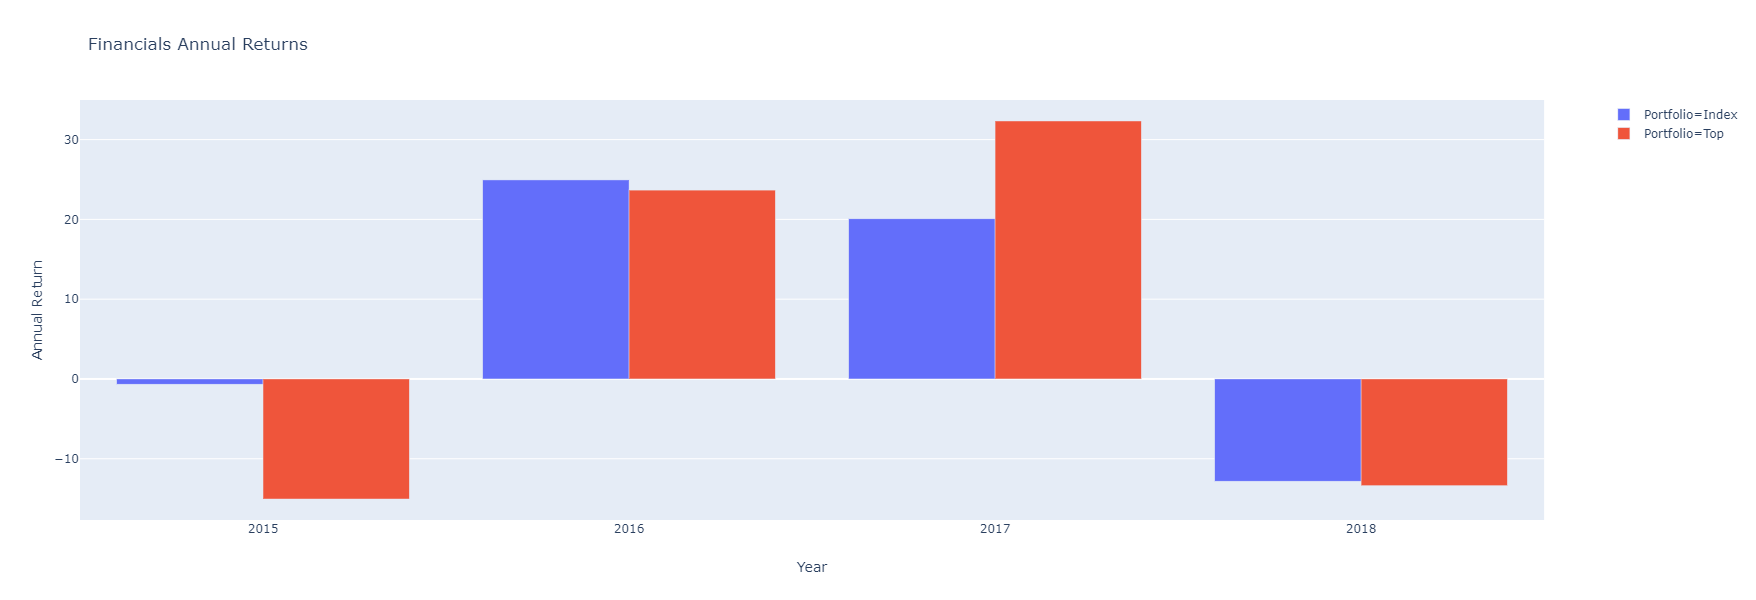

In [57]:
fig = px.bar(fin_df, x="Year", y="Annual Return", color="Portfolio", barmode="group", title="Financials Annual Returns")
fig

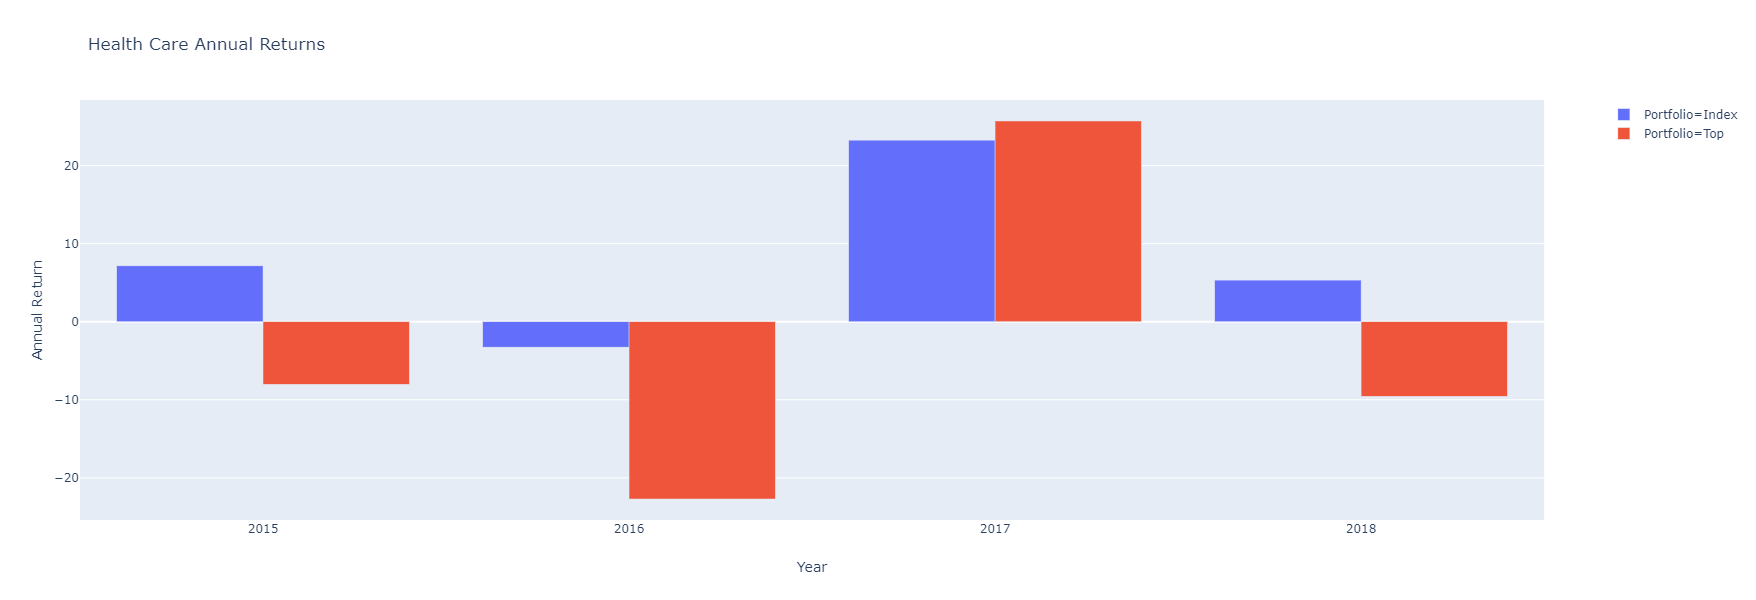

In [64]:
fig_health = px.bar(health, x="Year", y="Annual Return", color="Portfolio", barmode="group", title="Health Care Annual Returns")
fig_health